<a href="https://colab.research.google.com/github/btrosso/TensorFlow_Learning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write meural networks for classification problems.

A classification problem is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now letrs visualize it

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


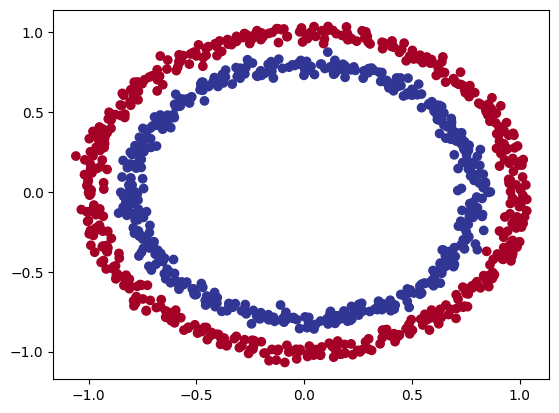

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [10]:
import tensorflow as tf

# Set the seed for reproducibility
tf.random.set_seed(42)

# Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# Fit the model
model_1.fit(X, y, epochs=5)

# Evaluate the model
# model_1.evaluate()

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.4471 - accuracy: 0.4710
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.1569 - accuracy: 0.5300
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.4707 - accuracy: 0.5730
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2624 - accuracy: 0.5440
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2499 - accuracy: 0.5400


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 8.0584 - accuracy: 0.4510


[8.058367729187012, 0.45100000500679016]

Since we're working on a binary classification model and our model is getting around 50% accuracy it is performing as if it is guessing. So lets add an extra layer.

In [12]:
# Set the seed for reproducibility
tf.random.set_seed(42)

# Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

# Compile the model
model_2.compile(
    loss=tf.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000


[0.693359375, 0.5]

In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our Model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - add more layers or increase the number of hidden units
2. Compiling a model - might choose a different optimization function such as Adam instead of SGD
3. Fiting a model - might fit our model for more epochs, leave it training for longer

In [14]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5020


[0.6950101256370544, 0.5019999742507935]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will :

* Take in a trained model, features (X) and labels (y)
* Create a mesh grid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [16]:
import sys
import traceback
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://madewithml.com/
  """
  try:
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multiclass
    if len(y_pred[0]) > 1:
      print("Doing Multiclass Classification")
      # We have to reshape our prediction to get them ready for plotting
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
      print("Doing Binary Classification")
      y_pred = np.round(y_pred).reshape(xx.shape)

      # Plot the decision boundary
      plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
      plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
  except Exception as e:
      exc_type, exc_value, exc_traceback = sys.exc_info()
      # Print or handle the exception information
      print(f"Exception Type: {exc_type}")
      print(f"Exception Value: {exc_value}")
      print("Traceback:")
      for tb in traceback.format_tb(exc_traceback):
          print(tb)

313/313 [==============================] - 1s 1ms/step
Doing Binary Classification


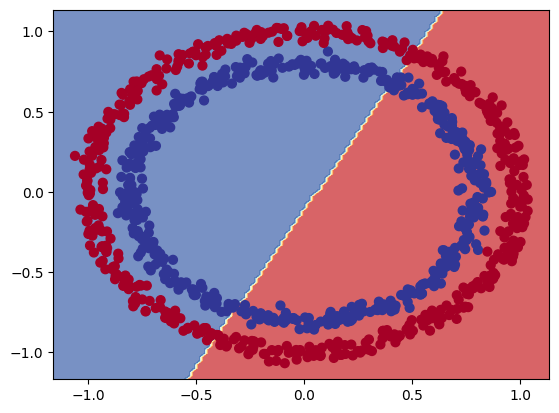

In [17]:
# Checkout the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [ ]:
# Let's see if outr model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait....we compiled our model for a binary classification problem.

But...we're now working on a regression problem, lets change the model to suit our data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_r = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_r.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
model_r.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

2/2 [==============================] - 0s 5ms/step


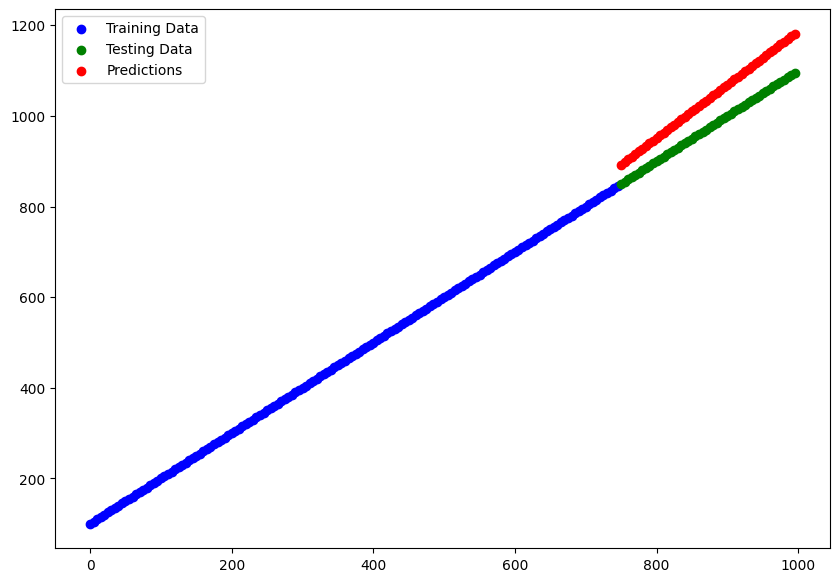

In [32]:
# Make predicitions with our trained model
y_reg_preds = model_r.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();


### The missing Piece: None-Linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

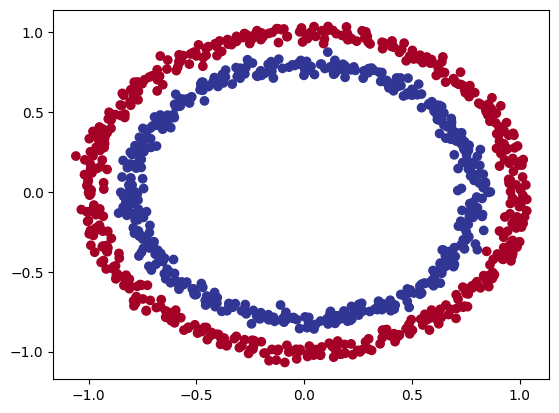

In [47]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing Binary Classification


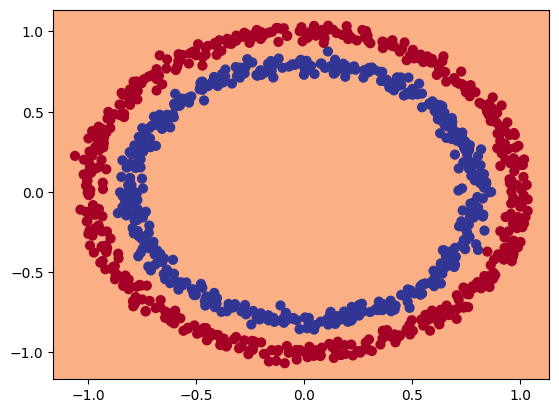

In [48]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_4, X=X, y=y)